In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 实现内容

## 数据集内容解析

## 少量的数据分析内容
## 在年龄上与存活率进行逻辑斯蒂回归

## 以多个属性和存活率做K近邻预测





## 数据集内容解析
看简介了解到，根据所给的数据（即属性）来判断存活率受什么影响最大，也可以是输入预测的属性来预测存活率

## 数据分析

In [2]:
import numpy as np 
import pandas as pd 
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 查看是否存在空数据，需要进行数据清洗的内容

In [3]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### 删除数据中的空白内容

In [4]:
train_data.dropna(inplace=True)

In [5]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

### 查看存活下来的年龄分布以及占总人数的多少

In [6]:
survived = train_data['Survived']
survived.value_counts(1)

1    0.672131
0    0.327869
Name: Survived, dtype: float64

In [7]:
# 对年纪和存活率进行聚合
survived_age = train_data[['Age','Survived']]
survived_age_true = survived_age.loc[survived_age['Survived']==1]

<AxesSubplot:ylabel='Frequency'>

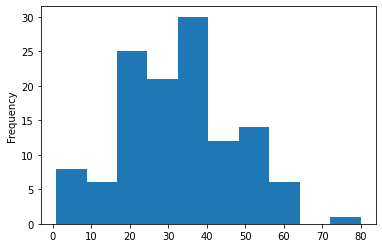

In [8]:
survived_age_true['Age'].plot(kind='hist')

## 单一属性 逻辑斯蒂回归

### 划分数据

In [9]:
X_age = train_data['Age']
y_age = train_data['Survived']


In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X_age,y_age,test_size=0.2)

In [11]:

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(146,) (146,)
(37,) (37,)


### 构建模型

In [12]:
x_train = np.array(x_train).reshape(-1,1)

In [13]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=72)

In [14]:
reg.fit(x_train,y_train)

LogisticRegression(random_state=72)

In [15]:
x_test = np.array(x_test).reshape(-1,1)
y_pred = reg.predict(x_test)

**调用sklearn中的一个检测精度api**

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7297297297297297

预测数据

In [17]:
# 数字为输入
single_test = np.array([60]).reshape(-1,1)
single_test.shape
reg.predict(single_test)

array([0])

## 多个属性 k近邻

In [18]:
# 重新导入数据
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.dropna(inplace=True)


In [19]:
# 定义数据集
df = train_data.drop(columns=['PassengerId','Name','Cabin','Embarked','SibSp','Parch','Ticket','Sex','Survived'])
y = train_data['Survived']
df[:3]

,Pclass,Age,Fare
1,1,38.0,71.2833
3,1,35.0,53.1000
6,1,54.0,51.8625


In [20]:
# X_train, y_train, X_test, y_test = train_test_split(df, y, test_size=0.2,)

x_train,x_test,y_train ,y_test = train_test_split(df,y,test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(146, 3) (146,)
(37, 3) (37,)


In [21]:
X_train = np.array(x_train).reshape(-1,1)
X_test = np.array(x_test).reshape(-1,1)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = knn_classifier.predict(x_test)
y_pred.shape

(37,)

In [25]:
# 直接使用sklearn中的api查看精准度
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7567567567567568